# Risk Minimization

In [1]:
#!pip install numpy pandas scikit-learn xgboost matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd

# Set a random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 1000

# Generate ovd_days (overdue days)
ovd_days = np.random.randint(0, 120, size=n_samples)

# Generate ovd30, ovd60, ovd90 based on ovd_days
ovd30 = np.where(ovd_days >= 30, np.random.uniform(100, 1000, size=n_samples), 0)
ovd60 = np.where(ovd_days >= 60, np.random.uniform(100, 1000, size=n_samples), 0)
ovd90 = np.where(ovd_days >= 90, np.random.uniform(100, 1000, size=n_samples), 0)

# Generate additional 16 features (e.g., income, age, credit score, etc.)
additional_features = {
    f'feature_{i}': np.random.uniform(0, 1, size=n_samples)
    for i in range(1, 17)
}

# Define the target variable 'default'
default = np.where(ovd_days >= 90, 1, 0)

# Create a DataFrame
data = pd.DataFrame({
    'ovd_days': ovd_days,
    'ovd30': ovd30,
    'ovd60': ovd60,
    'ovd90': ovd90,
    'default': default
})

# Add additional features to the DataFrame
for feature_name, values in additional_features.items():
    data[feature_name] = values

# Display the first few rows
print(data.head())


   ovd_days       ovd30       ovd60       ovd90  default  feature_1  \
0       102  347.258617  365.750460  828.264854        1   0.170115   
1        51  286.504884    0.000000    0.000000        0   0.898238   
2        92  890.398601  266.705602  730.030845        1   0.776803   
3        14    0.000000    0.000000    0.000000        0   0.076480   
4       106  142.206821  482.074683  459.190169        1   0.986729   

   feature_2  feature_3  feature_4  feature_5  ...  feature_7  feature_8  \
0   0.772671   0.910665   0.970555   0.874897  ...   0.210387   0.825302   
1   0.714900   0.435672   0.558953   0.771783  ...   0.290295   0.066410   
2   0.578978   0.129086   0.336394   0.417907  ...   0.786544   0.170860   
3   0.014609   0.742299   0.519022   0.748406  ...   0.159390   0.311121   
4   0.360375   0.643104   0.979263   0.961335  ...   0.044092   0.320699   

   feature_9  feature_10  feature_11  feature_12  feature_13  feature_14  \
0   0.452029    0.665473    0.268009    

Missing values in each column:
ovd_days      0
ovd30         0
ovd60         0
ovd90         0
default       0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
dtype: int64


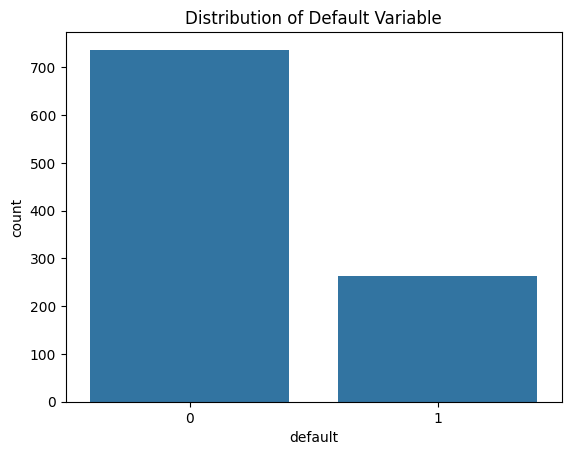

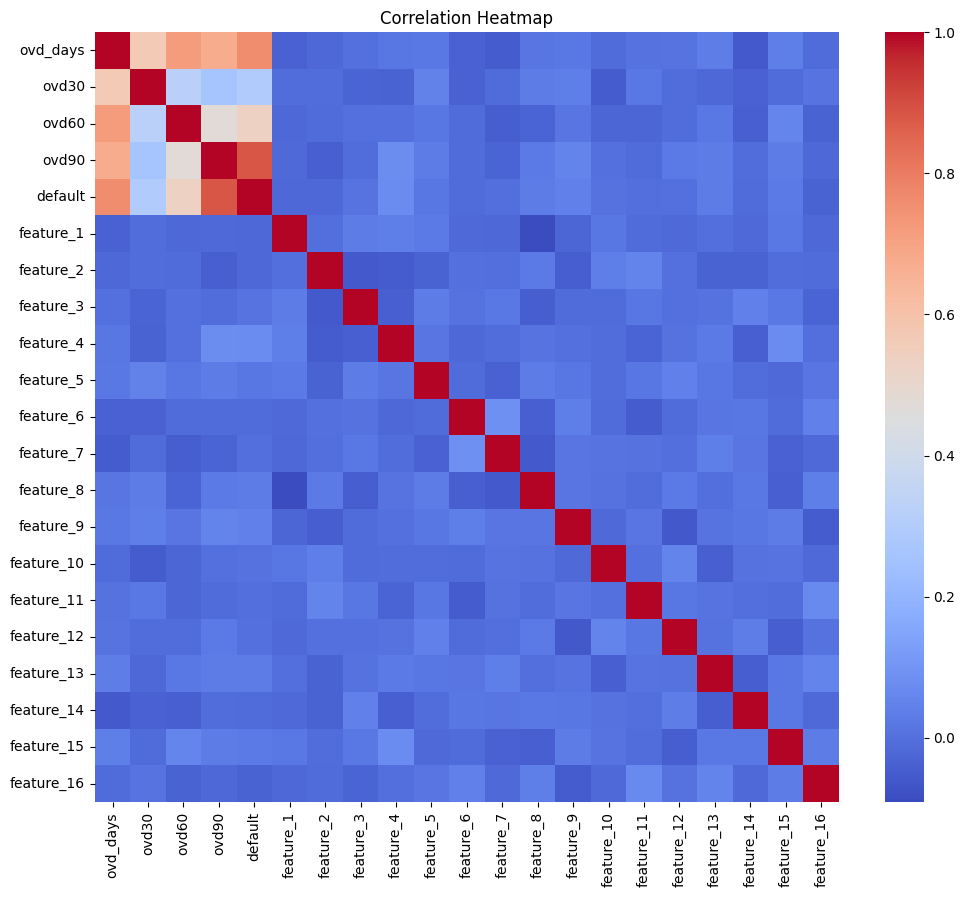

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Distribution of the target variable
sns.countplot(x='default', data=data)
plt.title('Distribution of Default Variable')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()


In [4]:
# Data Pre-processing
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = data.drop('default', axis=1)
y = data['default']

# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [5]:
# Split the dataset into training and testing sets.
from sklearn.model_selection import train_test_split

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [6]:
# !pip install xgboost

In [7]:
# building the model 
import xgboost as xgb
from xgboost import XGBClassifier

# Initialize the model
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    # use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

Accuracy: 1.00


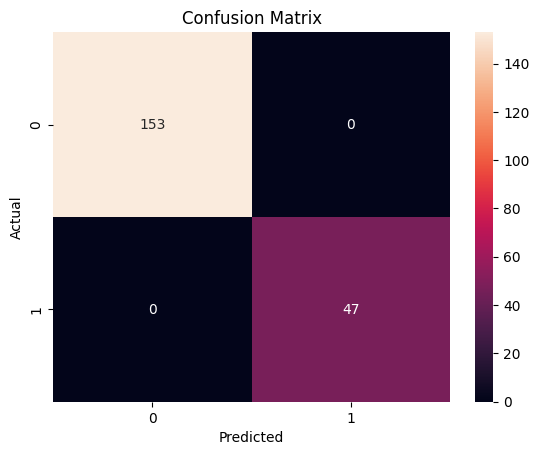

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       153
           1       1.00      1.00      1.00        47

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

ROC AUC Score: 1.00


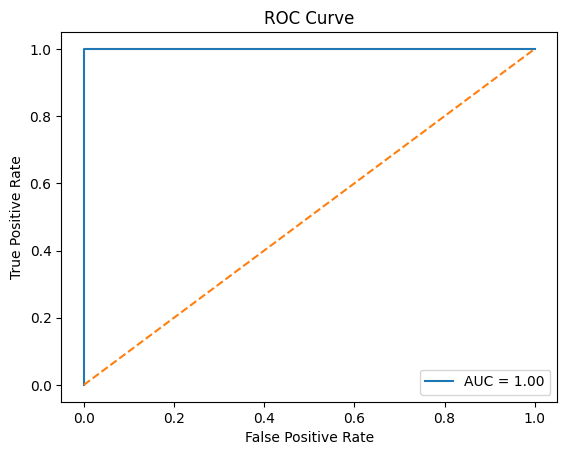

In [8]:
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
)

# Predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# ROC AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


## Model Comparisons

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Generate synthetic data
np.random.seed(42)
n_samples = 1000
ovd_days = np.random.randint(0, 120, size=n_samples)
ovd30 = np.where(ovd_days >= 30, np.random.uniform(100, 1000, size=n_samples), 0)
ovd60 = np.where(ovd_days >= 60, np.random.uniform(100, 1000, size=n_samples), 0)
ovd90 = np.where(ovd_days >= 90, np.random.uniform(100, 1000, size=n_samples), 0)
additional_features = {f'feature_{i}': np.random.uniform(0, 1, size=n_samples) for i in range(1, 17)}
default = np.where(ovd_days >= 90, 1, 0)

# Create DataFrame
data = pd.DataFrame({'ovd_days': ovd_days, 'ovd30': ovd30, 'ovd60': ovd60, 'ovd90': ovd90, 'default': default})
for feature_name, values in additional_features.items():
    data[feature_name] = values

# Splitting data into train, validation, and holdout sets
X = data.drop('default', axis=1)
y = data['default']

# Train-Validation-Holdout split (60-20-20)
X_train_full, X_holdout, y_train_full, y_holdout = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=42)  # 0.25 x 0.8 = 0.2

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Holdout set size: {X_holdout.shape[0]}")


Training set size: 600
Validation set size: 200
Holdout set size: 200


In [10]:
#!pip install catboost

In [11]:
# Indivudal Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

# Instantiate individual models
logistic_model = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
xgboost_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, eval_metric='logloss')
lightgbm_model = lgb.LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
catboost_model = CatBoostClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42, verbose=0)


In [12]:
# Stacking
# For stacking, we will combine the predictions of individual models using a meta-model.
from sklearn.ensemble import StackingClassifier

# Define base models for stacking
base_models = [
    ('logistic', logistic_model),
    ('decision_tree', decision_tree),
    ('random_forest', random_forest),
    ('xgboost', xgboost_model),
    ('lightgbm', lightgbm_model),
    ('catboost', catboost_model)
]

# Meta-model: Logistic Regression
meta_model = LogisticRegression(random_state=42)

# Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)


In [13]:
# Training all models
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree,
    "Random Forest": random_forest,
    "XGBoost": xgboost_model,
    "LightGBM": lightgbm_model.set_params(verbose=-1),  # Set verbose to -1 to silence output
    "CatBoost": catboost_model,
    "Stacking Model": stacking_model
}

# Train each model on the training set
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)


Training Logistic Regression...
Training Decision Tree...
Training Random Forest...


Training XGBoost...
Training LightGBM...


Training CatBoost...


Training Stacking Model...


In [14]:
# !pip install ace_tools

In [15]:
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score

def evaluate_model(model, X, y):
    """
    Evaluate the model on the given dataset and return various performance metrics.
    
    Parameters:
    - model: Trained model to evaluate
    - X: Feature matrix
    - y: True labels
    
    Returns:
    - accuracy: Accuracy score of the model
    - roc_auc: ROC AUC score
    - precision: Precision score
    - recall: Recall score
    """
    predictions = model.predict(X)
    proba = model.predict_proba(X)[:, 1]  # Probability estimates for the positive class
    accuracy = accuracy_score(y, predictions)
    roc_auc = roc_auc_score(y, proba)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    return accuracy, roc_auc, precision, recall

# Evaluating models on the validation set
validation_results = pd.DataFrame(columns=["Model", "Accuracy", "ROC AUC", "Precision", "Recall"])

for name, model in models.items():
    accuracy, roc_auc, precision, recall = evaluate_model(model, X_val, y_val)
    result = pd.DataFrame({
        "Model": [name],
        "Accuracy": [accuracy],
        "ROC AUC": [roc_auc],
        "Precision": [precision],
        "Recall": [recall]
    })
    validation_results = pd.concat([validation_results, result], ignore_index=True)


# Evaluate each model on the holdout set
holdout_results = pd.DataFrame(columns=["Model", "Accuracy", "ROC AUC", "Precision", "Recall"])

for name, model in models.items():
    accuracy, roc_auc, precision, recall = evaluate_model(model, X_holdout, y_holdout)
    result = pd.DataFrame({
        "Model": [name],
        "Accuracy": [accuracy],
        "ROC AUC": [roc_auc],
        "Precision": [precision],
        "Recall": [recall]
    })
    holdout_results = pd.concat([holdout_results, result], ignore_index=True)

# Display holdout results
print(holdout_results)

                 Model  Accuracy  ROC AUC  Precision  Recall
0  Logistic Regression       1.0      1.0        1.0     1.0
1        Decision Tree       1.0      1.0        1.0     1.0
2        Random Forest       1.0      1.0        1.0     1.0
3              XGBoost       1.0      1.0        1.0     1.0
4             LightGBM       1.0      1.0        1.0     1.0
5             CatBoost       1.0      1.0        1.0     1.0
6       Stacking Model       1.0      1.0        1.0     1.0
